## Spectral graph analysis
* [Excellent Class notes of course by Dan Spielman](http://www.cs.yale.edu/homes/spielman/561/2012/)



In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Definition of some graphs

In [2]:
%%writefile line.dot
graph G {
0 [style=filled];
1 [style=filled];
2 [style=filled];
3 [style=filled];
4 [style=filled];
5 [style=filled];
6 [style=filled];
7 [style=filled];
8 [style=filled];
9 [style=filled];
10 [style=filled];
11 [style=filled];
12 [style=filled];
13 [style=filled];
14 [style=filled];
15 [style=filled];
16 [style=filled];
17 [style=filled];
18 [style=filled];
19 [style=filled];
20 [style=filled];
21 [style=filled];
22 [style=filled];
23 [style=filled];
0--1--2--3--4--5--6--7--8--9--10--11--12--13--14--15--16--17--18--19--20--21--22--23;
}

Overwriting line.dot


In [3]:
%%writefile star.dot
graph G {
0 [style=filled];
1 [style=filled];
2 [style=filled];
3 [style=filled];
4 [style=filled];
5 [style=filled];
6 [style=filled];
7 [style=filled];
0--1;
0--2;
0--3;
0--4;
0--5;
0--6;
0--7;
}

Overwriting star.dot


In [4]:
%%writefile circle.dot
graph G {
0 [style=filled];
1 [style=filled];
2 [style=filled];
3 [style=filled];
4 [style=filled];
5 [style=filled];
6 [style=filled];
7 [style=filled];
0--1--2--3--4--5--6--7--0;
}

Overwriting circle.dot


In [5]:
%%writefile twoblobs.dot
graph G {
0 [style=filled];
1 [style=filled];
2 [style=filled];
3 [style=filled];
4 [style=filled];
5 [style=filled];
6 [style=filled];
7 [style=filled];
0--1; 0--2; 0--3;
1--2;1--3;
2--3;
3--4;
4--5;4--6;4--7;
5--6;5--7;
6--7;
}

Overwriting twoblobs.dot


In [6]:
%%writefile twoD.dot
graph G {
0 [style=filled];
1 [style=filled];
2 [style=filled];
3 [style=filled];
4 [style=filled];
5 [style=filled];
6 [style=filled];
7 [style=filled];
8 [style=filled];
9 [style=filled];
10 [style=filled];
11 [style=filled];
12 [style=filled];
13 [style=filled];
14 [style=filled];
15 [style=filled];


0--1--2--3;
4--5--6--7;
8--9--10--11;
12--13--14--15;
0--4--8--12;
1--5--9--13;
2--6--10--14;
3--7--11--15;
}

Overwriting twoD.dot


### Read and display a graph

In [73]:
import pydot
filename='twoD'
dot=open(filename+'.dot','r').readlines()
dot=''.join(dot)

G=pydot.dot_parser.parse_dot_data(dot)
G.write_gif(filename+'.gif')
gif_name=filename+'.gif'
!open $gif_name

### Compute graph matrices
* A: Adjacency matrix
* D: Degree Matrix

In [74]:
from numpy.linalg import eigh
from numpy import matrix

node_n=len(G.get_nodes())
A=matrix(np.zeros([node_n,node_n])) # adjacency matrix
for edge in G.get_edge_list():
    _i=int(edge.get_source())
    _j=int(edge.get_destination())
    A[_i,_j]=1
    A[_j,_i]=1

D=matrix(np.zeros([node_n,node_n])) # degree matrix 
for i in range(node_n):
    D[i,i]=sum(A[i,:])


### Find eigen-decomposition of laplacian

In [75]:
L=D-A  # the laplacian
w,v=eigh(L) # perform eigen-decomposition of a symmetric (Hermitian) matrix
print 'eigenvalues=',w

eigenvalues= [ -8.14227672e-16   5.85786438e-01   5.85786438e-01   1.17157288e+00
   2.00000000e+00   2.00000000e+00   2.58578644e+00   2.58578644e+00
   3.41421356e+00   3.41421356e+00   4.00000000e+00   4.00000000e+00
   4.00000000e+00   5.41421356e+00   5.41421356e+00   6.82842712e+00]


In [76]:
_range=[0.,100.]
_offset=_range[0]
_scale=_range[1]-_range[0]
_min=-1.;_max=1.;

def vec2color(vec):
    return['grey'+str(int(_offset+_scale*(x-_min)/(_max-_min))) for x in vec]

def graph_eig(G,v,filename):
    node_n=shape(v)[0]
    for j in range(min(10,node_n)):
        colors=vec2color(v[:,j])
        #print j,colors
        for node in G.get_node_list():
            i=int(node.get_name())
            node.set_color(colors[i])
        G.write_gif("%s.%d.gif"%(filename,j))

In [77]:
!rm $filename*.gif
graph_eig(G,v,filename)
!open $filename*.gif

In [60]:
def print_eig(w,v):
    for i in range(node_n):
        print str(i),'eigval:%5.2f'%w[i],
        print 'eigvec:',', '.join(['%5.1f'%x for x in v[:,i]])
print_eig(w,v)

0 eigval:-0.00 eigvec:   0.4,   0.4,   0.4,   0.4,   0.4,   0.4,   0.4,   0.4
1 eigval: 1.00 eigvec:   0.0,  -0.4,   0.9,  -0.1,  -0.1,  -0.1,  -0.1,  -0.1
2 eigval: 1.00 eigvec:   0.0,  -0.4,  -0.1,   0.9,  -0.1,  -0.1,  -0.1,  -0.1
3 eigval: 1.00 eigvec:   0.0,  -0.4,  -0.1,  -0.1,   0.9,  -0.1,  -0.1,  -0.1
4 eigval: 1.00 eigvec:   0.0,  -0.4,  -0.1,  -0.1,  -0.1,   0.9,  -0.1,  -0.1
5 eigval: 1.00 eigvec:   0.0,  -0.4,  -0.1,  -0.1,  -0.1,  -0.1,   0.9,  -0.1
6 eigval: 1.00 eigvec:   0.0,  -0.4,  -0.1,  -0.1,  -0.1,  -0.1,  -0.1,   0.9
7 eigval: 8.00 eigvec:  -0.9,   0.1,   0.1,   0.1,   0.1,   0.1,   0.1,   0.1


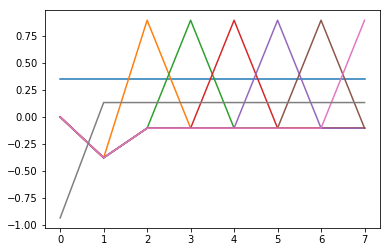

In [61]:
plot(v[:,:]);

### random walk

One interesting way to understand the structure of graphs is to think of the graph as if it was made out of some heat-conducting material such as metal, that the nodes are small balls and the edges are wires connecting the balls. Suppose the wires are equal in length and conductivity.

Suppose the balls start at different termperatures. The temperature of each ball changes according to the difference between the temperature of the ball and the temperatures of neighboring balls.

Ultimately all of the balls reach the same temperature.

Denote a particular ball by $0$ and denote the balls it is connected to by $1,2,\ldots,k$.

Let $T_i$ be the temperature of ball $i$. The *rate of change* in the temperature of ball $0$ is
$$
\frac{dT_0}{dt} = C \left( \sum_{i=1}^{k} T_i - k T_0 \right)
$$

A similar relation holds for each of the nodes. We can write the relation using 

In [78]:
DI = matrix(np.zeros([node_n,node_n])) # Inverse of degree matrix 
for i in range(node_n):
    DI[i,i]=1./D[i,i]
W=0.5*(eye(node_n)+A*DI)

In [79]:
ww,vv=eig(W)
print_eig(ww,vv)

0 eigval: 1.00 eigvec:  -0.2,  -0.2,  -0.2,  -0.2,  -0.2,  -0.3,  -0.3,  -0.2,  -0.2,  -0.3,  -0.3,  -0.2,  -0.2,  -0.2,  -0.2,  -0.2
1 eigval: 0.00 eigvec:  -0.2,   0.2,  -0.2,   0.2,   0.2,  -0.3,   0.3,  -0.2,  -0.2,   0.3,  -0.3,   0.2,   0.2,  -0.2,   0.2,  -0.2
2 eigval: 0.75 eigvec:   0.3,   0.2,  -0.2,  -0.3,   0.2,   0.2,  -0.2,  -0.2,  -0.2,  -0.2,   0.2,   0.2,  -0.3,  -0.2,   0.2,   0.3
3 eigval: 0.25 eigvec:   0.3,  -0.2,  -0.2,   0.3,  -0.2,   0.2,   0.2,  -0.2,  -0.2,   0.2,   0.2,  -0.2,   0.3,  -0.2,  -0.2,   0.3
4 eigval: 0.11 eigvec:   0.3,  -0.4,   0.2,  -0.0,  -0.4,   0.3,  -0.0,  -0.2,   0.2,   0.0,  -0.3,   0.4,   0.0,  -0.2,   0.4,  -0.3
5 eigval: 0.89 eigvec:  -0.3,  -0.4,  -0.2,  -0.0,  -0.4,  -0.3,  -0.0,   0.2,  -0.2,  -0.0,   0.3,   0.4,  -0.0,   0.2,   0.4,   0.3
6 eigval: 0.89 eigvec:   0.0,   0.2,   0.4,   0.3,  -0.2,   0.0,   0.3,   0.4,  -0.4,  -0.3,  -0.0,   0.2,  -0.3,  -0.4,  -0.2,  -0.0
7 eigval: 0.11 eigvec:  -0.2,   0.1,   0.2,  -0.2,   0.4,  -0.

In [80]:
graph_eig(G,vv,filename+'.RW')
fname=filename+'.RW.*'
!open $fname